## Questions to Consider
* What is the beer consumption in ATX, DFW, HOU, San Antonio?
    * How has it changed over the past 3 Years?
* Who are the top sellers in ATX, DFW, HOU, San Antonio?
* Is there a correlation between beer consumption, wine consumption, and liquor consumption?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
alcohol_data = pd.read_csv("data/Mixed_Beverage_Gross_Receipts.csv")

In [3]:
# remove spacing from cloumn names
alcohol_data.rename(columns=lambda s: s.replace(" ", "_"), inplace=True)

#change strings to dates
alcohol_data['Responsibility_Begin_Date'] = pd.to_datetime(alcohol_data['Responsibility_Begin_Date'])
alcohol_data['Responsibility_End_Date'] = pd.to_datetime(alcohol_data['Responsibility_End_Date'])
alcohol_data['Obligation_End_Date'] = pd.to_datetime(alcohol_data['Obligation_End_Date'])

In [4]:
alcohol_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2829288 entries, 0 to 2829287
Data columns (total 24 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   Taxpayer_Number             int64         
 1   Taxpayer_Name               object        
 2   Taxpayer_Address            object        
 3   Taxpayer_City               object        
 4   Taxpayer_State              object        
 5   Taxpayer_Zip                float64       
 6   Taxpayer_County             int64         
 7   Location_Number             int64         
 8   Location_Name               object        
 9   Location_Address            object        
 10  Location_City               object        
 11  Location_State              object        
 12  Location_Zip                int64         
 13  Location_County             int64         
 14  Inside/Outside_City_Limits  object        
 15  TABC_Permit_Number          object        
 16  Responsibility_Beg

### From my understanding, the data is already clean. <br>Here's a [link to the data](https://data.texas.gov/dataset/Mixed-Beverage-Gross-Receipts/naix-2893) for those who are curious.

In [5]:
# look for duplicates
print("Before dropping dupes:", len(alcohol_data))

alcohol_data.drop_duplicates(inplace=True, ignore_index=True)
print("After dropping dupes:", len(alcohol_data))

Before dropping dupes: 2829288
After dropping dupes: 2829288


In [6]:
alcohol_data["Location_City"].value_counts()

HOUSTON        378037
DALLAS         241200
SAN ANTONIO    184200
AUSTIN         177581
FORT WORTH     102328
                ...  
AURORA              1
GRAPELAND           1
DALE                1
INDUSTRY            1
GROESBECK           1
Name: Location_City, Length: 956, dtype: int64

In [7]:
# create seperate data sets for each city of interest

atx_data = alcohol_data[alcohol_data["Location_City"] == "AUSTIN"].reset_index()
dallas_data = alcohol_data[alcohol_data["Location_City"] == "DALLAS"].reset_index()
fort_data = alcohol_data[alcohol_data["Location_City"] == "FORT WORTH"].reset_index()
hou_data = alcohol_data[alcohol_data["Location_City"] == "HOUSTON"].reset_index()
san_an_data = alcohol_data[alcohol_data["Location_City"] == "SAN ANTONIO"].reset_index()

In [8]:
#union Dallas data and Fort Worth data
dfw_data = pd.concat([dallas_data, fort_data],ignore_index=True).drop_duplicates().reset_index(drop=True)

In [9]:
# remove data sets that are no longer needed
del dallas_data
del fort_data

In [10]:
# seperate beer consumption by the past four years

total_beer_consumption_by_city_22 = pd.concat([atx_data, hou_data, san_an_data, dfw_data],ignore_index=True)\
                                    .drop_duplicates() \
                                    .reset_index(drop=True) \
                                    .query("Responsibility_Begin_Date >= '2022-01-01'") \
                                    .groupby("Location_City")["Beer_Receipts"].sum().sort_values(ascending=False)


total_beer_consumption_by_city_21 = pd.concat([atx_data, hou_data, san_an_data, dfw_data],ignore_index=True)\
                                    .drop_duplicates() \
                                    .reset_index(drop=True) \
                                    .query("Responsibility_Begin_Date >= '2021-01-01' and Responsibility_Begin_Date <= '2021-12-31'") \
                                    .groupby("Location_City")["Beer_Receipts"].sum().sort_values(ascending=False)


total_beer_consumption_by_city_20 = pd.concat([atx_data, hou_data, san_an_data, dfw_data],ignore_index=True)\
                                    .drop_duplicates() \
                                    .reset_index(drop=True) \
                                    .query("Responsibility_Begin_Date >= '2020-01-01' and Responsibility_Begin_Date <= '2020-12-31'") \
                                    .groupby("Location_City")["Beer_Receipts"].sum().sort_values(ascending=False)


total_beer_consumption_by_city_19 = pd.concat([atx_data, hou_data, san_an_data, dfw_data],ignore_index=True)\
                                    .drop_duplicates() \
                                    .reset_index(drop=True) \
                                    .query("Responsibility_Begin_Date >= '2019-01-01' and Responsibility_Begin_Date <= '2019-12-31'") \
                                    .groupby("Location_City")["Beer_Receipts"].sum().sort_values(ascending=False)

In [11]:
# combine recent beer sales data

dict_years = {'2019': total_beer_consumption_by_city_19,
             '2020': total_beer_consumption_by_city_20,
             '2021': total_beer_consumption_by_city_21,
             '2022': total_beer_consumption_by_city_22}

recent_beer_data = pd.DataFrame(dict_years)
recent_beer_data = recent_beer_data.transpose()
recent_beer_data["Year"] = ["2019", "2020", "2021", "2022"]

Location_City,AUSTIN,DALLAS,FORT WORTH,HOUSTON,SAN ANTONIO,Year
2019,37221562,60637909,43462408,73039967,37865522,2019
2020,21458558,29214660,16858424,23902643,31130493,2020
2021,44939325,16726472,11254861,24320837,18748734,2021
2022,7369056,2732736,3523669,2754128,3184072,2022


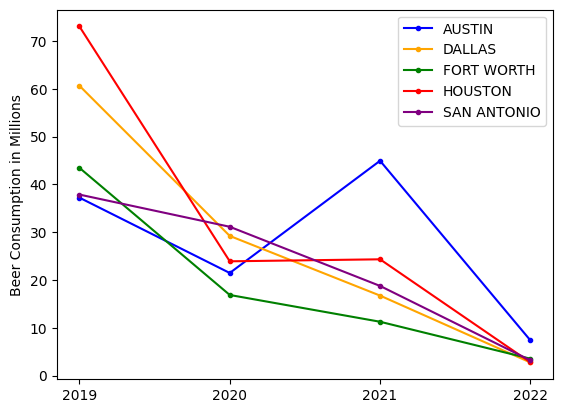

In [12]:
# create time series chart

import matplotlib.ticker as ticker

fig, ax = plt.subplots()

plt.plot("Year", "AUSTIN", data=recent_beer_data, marker='o', markerfacecolor='blue', markersize=3, color='blue')
plt.plot("Year", "DALLAS", data=recent_beer_data, marker='o', markerfacecolor='orange', markersize=3, color='orange')
plt.plot("Year", "FORT WORTH", data=recent_beer_data, marker='o', markerfacecolor='green', markersize=3, color='green')
plt.plot("Year", "HOUSTON", data=recent_beer_data, marker='o', markerfacecolor='red', markersize=3, color='red')
plt.plot("Year", "SAN ANTONIO", data=recent_beer_data, marker='o', markerfacecolor='purple', markersize=3, color='purple')

ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/1e6))
ax.yaxis.set_major_formatter(ticks_y)
ax.set_ylabel('Beer Consumption in Millions')
plt.legend(loc="upper right")

display(recent_beer_data)
plt.show()

#### Beer consumption has had a downward trend in the last few year. With huge dips in 2020 (pandemic) While beer consumption in Austin is larger in comparison to the other cities.

## Top 5 Beer Sellers in 2022 by City
### Austin

In [13]:
atx_data.query("Responsibility_Begin_Date >= '2022-01-01'")\
        .groupby("Taxpayer_Name")["Beer_Receipts"].sum().sort_values(ascending=False)[:5]

Taxpayer_Name
OVATIONS FOOD SERVICES OF TEXAS, LLC    3687455
BLANCONEGRO LLC                         1236086
EMOS CONCESSION COMPANY, LLC             874148
VINCENT'S ON THE LAKE LLC                168964
LW SOUTHPARK LLC                         150649
Name: Beer_Receipts, dtype: int64

### Houston

In [14]:
hou_data.query("Responsibility_Begin_Date >= '2022-01-01'")\
        .groupby("Taxpayer_Name")["Beer_Receipts"].sum().sort_values(ascending=False)[:5]

Taxpayer_Name
OL BEVERAGE HOLDINGS, LLC    411230
LW MIDTOWN LLC               243861
LW EADO LLC                  180946
COSTA LOUNGE, LLC            140896
DISTRICT 7 MAIN, LLC         128144
Name: Beer_Receipts, dtype: int64

### Dallas + Fort Worth

In [15]:
dfw_data.query("Responsibility_Begin_Date >= '2022-01-01'")\
        .groupby("Taxpayer_Name")["Beer_Receipts"].sum().sort_values(ascending=False)[:5]

Taxpayer_Name
THE STOCKYARDS ARMADILLO , LLC          2176430
CEIBAS DEL TRUJILLO, INC.                779979
SMG F&B TEXAS, INC.                      378427
OVATIONS FOOD SERVICES OF TEXAS, LLC     288937
CONCESSIONS MANAGEMENT, INC.             285631
Name: Beer_Receipts, dtype: int64

### San Antonio

In [16]:
san_an_data.query("Responsibility_Begin_Date >= '2022-01-01'")\
            .groupby("Taxpayer_Name")["Beer_Receipts"].sum().sort_values(ascending=False)[:5]

Taxpayer_Name
OL BEVERAGE HOLDINGS, LLC      750015
REYGADAS INVESTMENTS, LLC      134347
LW BABCOCK LLC                 134011
ROADHOUSE ENTERPRISES, INC.    132424
LE BAJEC LLC                   129127
Name: Beer_Receipts, dtype: int64

In [17]:
# Looking at correlations

# fig, ax = plt.subplots(figsize = (4, 3))

# x = atx_data.query("Responsibility_Begin_Date >= '2022-01-01'")["Beer_Receipts"]
# y = atx_data.query("Responsibility_Begin_Date >= '2022-01-01'")["Liquor_Receipts"]
# b, a = np.polyfit(x, y, deg=1)
# xseq = np.linspace(0, 10, num=100)

# ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# # Plot regression line
# ax.plot(xseq, a + b * xseq, color="k", lw=2.5)
# plt.show()

## Correlations between Beer, Wine, and Liquor Sales in 2022
### Austin 

<AxesSubplot: >

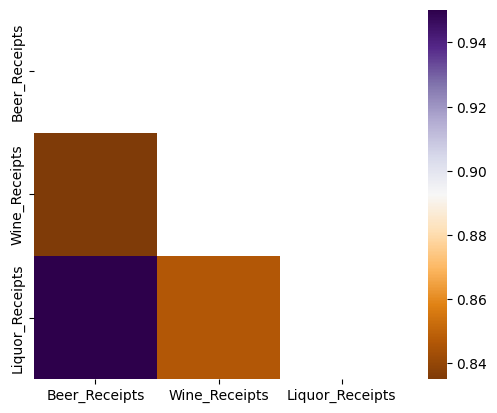

In [18]:
atx_alcohol_receipts = atx_data.query("Responsibility_Begin_Date >= '2022-01-01'")
atx_alcohol_receipts = atx_alcohol_receipts[["Beer_Receipts", "Wine_Receipts", "Liquor_Receipts"]]

corr_matrix=atx_alcohol_receipts.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_matrix, mask=mask, square=True, cmap='PuOr')

### Houston

<AxesSubplot: >

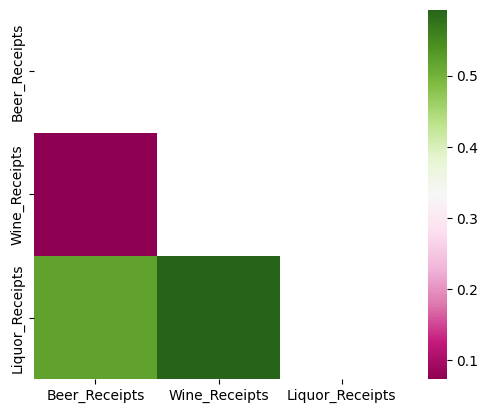

In [19]:
hou_alcohol_receipts = hou_data.query("Responsibility_Begin_Date >= '2022-01-01'")
hou_alcohol_receipts = hou_alcohol_receipts[["Beer_Receipts", "Wine_Receipts", "Liquor_Receipts"]]

corr_matrix=hou_alcohol_receipts.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_matrix, mask=mask, square=True, cmap='PiYG')

### Dallas + Fort Worth

<AxesSubplot: >

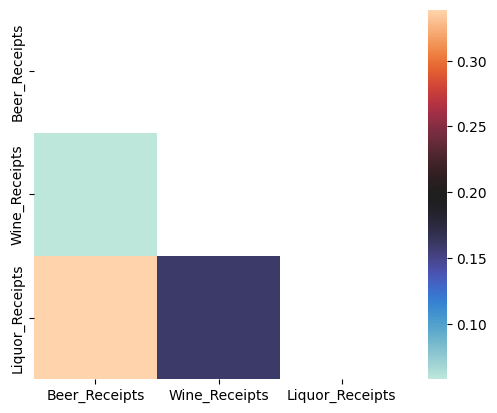

In [20]:
dfw_alcohol_receipts = dfw_data.query("Responsibility_Begin_Date >= '2022-01-01'")
dfw_alcohol_receipts = dfw_alcohol_receipts[["Beer_Receipts", "Wine_Receipts", "Liquor_Receipts"]]

corr_matrix=dfw_alcohol_receipts.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_matrix, mask=mask, square=True, cmap='icefire')

### San Antonio

<AxesSubplot: >

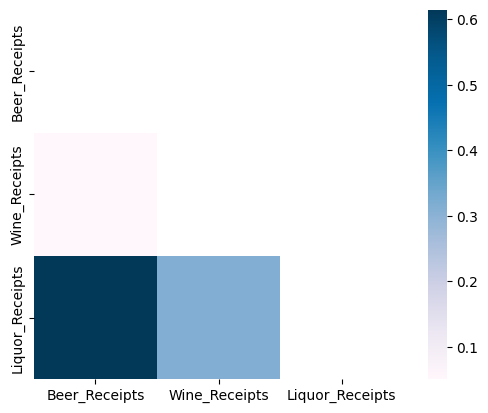

In [21]:
san_an_alcohol_receipts = san_an_data.query("Responsibility_Begin_Date >= '2022-01-01'")
san_an_alcohol_receipts = san_an_alcohol_receipts[["Beer_Receipts", "Wine_Receipts", "Liquor_Receipts"]]

corr_matrix=san_an_alcohol_receipts.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_matrix, mask=mask, square=True, cmap='PuBu')